In [ ]:
import numpy as np
for segement_idx in range(4):
    for layer_idx in range(32):
        for linear in ["qkv", "o", "gate_up", "down"]:
            act = np.load(f"input_act/seg_{segement_idx}_layer_{layer_idx:02}_{linear}.npy")
            # print(act.max(), act.min(), act.mean())
            if act.max() >= 5:
                print(f"input_act/seg_{segement_idx}_layer_{layer_idx:02}_{linear}.npy")

(2048, 11008)
171
[5155]
4.812


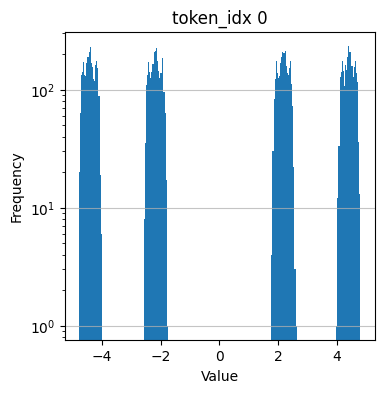

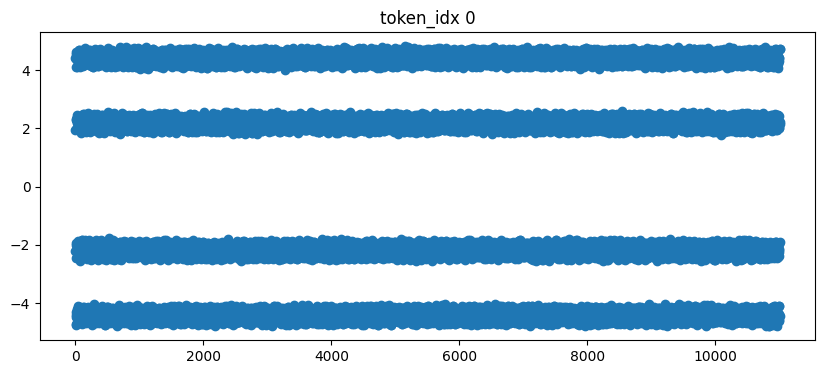

[1431]
17.02


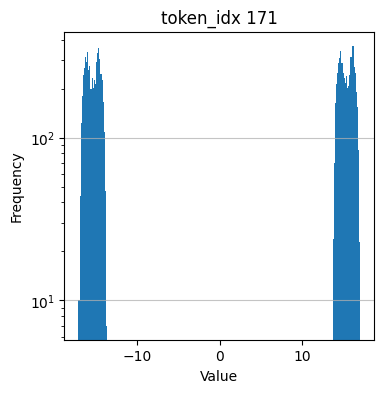

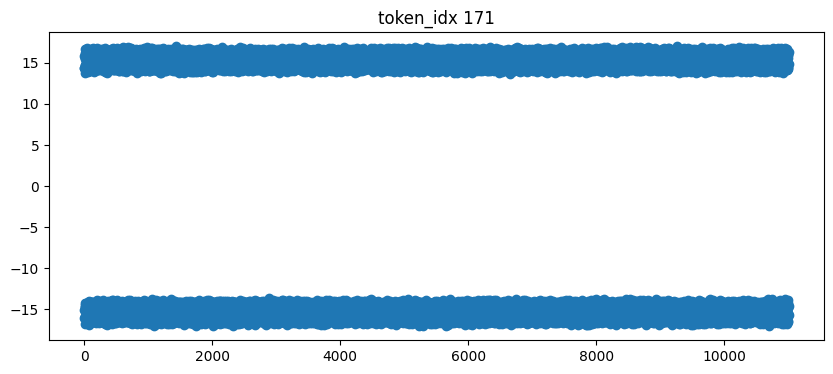

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# 假设你有一个二维数组，每行代表一个点的(x, y, z)坐标

# input_act/seg_0_layer_30_down.npy
# input_act/seg_1_layer_01_down.npy
# input_act/seg_1_layer_30_down.npy
# input_act/seg_2_layer_01_down.npy
# input_act/seg_2_layer_30_down.npy
# input_act/seg_3_layer_01_down.npy
file_name = "input_act/seg_3_layer_01_down.npy"
file_name = "input_act/seg_3_layer_01_down.npy"
# file_name = "input_act/seg_0_layer_05_gate_up.npy"
# file_name = "input_act/seg_0_layer_02_qkv.npy"
input_rotate = np.load(file_name).squeeze()
print(input_rotate.shape)

max_index = np.argmax(input_rotate, keepdims=True)

max_index_2d = np.unravel_index(max_index, input_rotate.shape)
print(max_index_2d[0][0][0])


for token_idx in range(2048):
    token_states = input_rotate[token_idx, :]

    # max_index = np.argmax(token_states, keepdims=True)
    # print(max_index)
    # print(token_states[max_index[0]])
    
    if token_states.max() >= 2:
    # if 1:
        max_index = np.argmax(token_states, keepdims=True)
        print(max_index)
        print(token_states[max_index[0]])
        plt.figure(figsize=(4, 4))
        plt.hist(token_states, bins=256)
        plt.title(f'token_idx {token_idx}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.yscale('log') 
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        plt.figure(figsize=(10, 4))
        plt.scatter(range(token_states.shape[-1]), token_states)
        plt.title(f'token_idx {token_idx}')
        plt.show()
